In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lcs import *
import networkx as nx
from scipy.stats import beta
import time

In [19]:
A = erdos_renyi(50, 0.2)
# A = zkc()
n = A.shape[0]

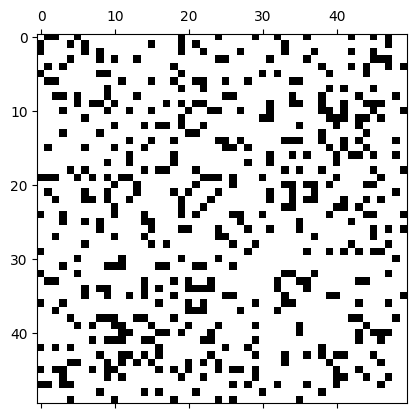

In [20]:
plt.spy(A)

In [21]:
rho0 = 1

x0 = np.zeros(n)
x0[list(random.sample(range(n), int(rho0 * n)))] = 1

gamma = 0.1
b = 0.04

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
contagion_function = lambda nu, b: b * (nu >= 2)
c = contagion_function(np.arange(n), b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=1000, random_seed=None)

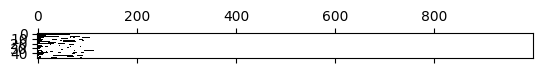

In [22]:
plt.spy(x.T)

In [23]:
p_c = np.ones((2, n))

p_rho = [1, 1]

rho0 = beta(p_rho[0], p_rho[1]).rvs()
print(rho0)

A0 = erdos_renyi(n, rho0)

samples, l = infer_adjacency_matrix(
    x, A0, p_rho, p_c, nsamples=100, burn_in=100, skip=150, return_likelihood=True
)

0.49801735157872756
Acceptance ratio is 0.5617391304347826


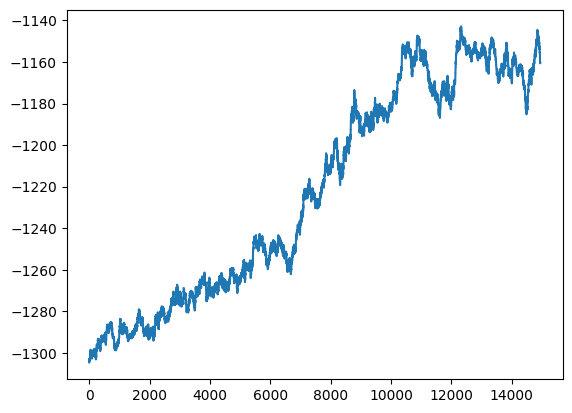

In [24]:
plt.plot(l)

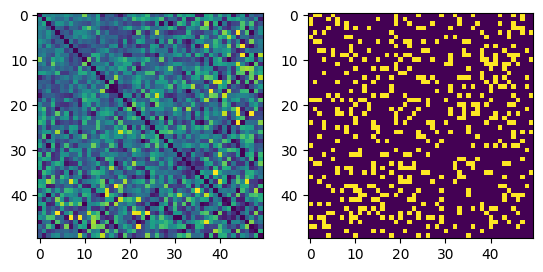

In [25]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p, cmap="viridis", vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(A, vmin=0, vmax=1)

In [42]:
def score(samples, A):
    n = A.shape[0]
    nsamples = samples.shape[0]

    num = (np.sum(samples == A) - nsamples * n) / 2
    den = nsamples * n * (n - 1) / 2
    return num / den


def score2(samples, A, threshold):
    Q = (samples.mean(axis=0) >= threshold)
    num = (np.sum(Q == A) - n) / 2
    den = n * (n - 1) / 2
    return num / den


def f_score(samples, A, threshold):
    Q = (samples.mean(axis=0) >= threshold)
    f = 0
    tp = np.sum(Q * A)
    fn = np.sum((1 - Q) * A)
    fp = np.sum(Q * (1 - A))

    f += 2 * tp / (2 * tp + fn + fp)
    return f


In [28]:
samplewise_posterior_similarity(samples, A)

0.27831139410932215

In [41]:
f_score(samples, np.zeros((50, 50)), 0.5)

0.0